# Project Overview

## Introduction:

In this project we are looking to determine how the “best neighborhood" is resource-rich and accessible for everyday living. A good neighborhood should make life easier, healthier and smarter for the residents. We are looking at three kinds of accessibility:  transit, healthcare, and education. Together, they are supporting how well the community supports people’s everyday lives.



# Education 

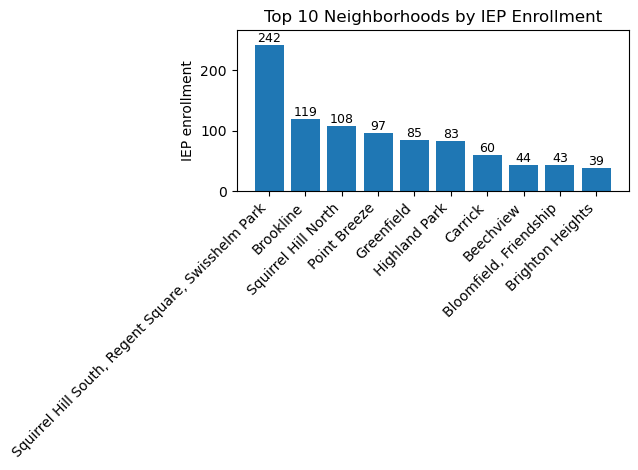

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("neighborhood_iep.csv")

d = df.iloc[:, :2].copy()
d.columns = ["neighborhood", "iep"]

d["iep"] = pd.to_numeric(d["iep"], errors="coerce").fillna(0)

top10 = d.sort_values("iep", ascending=False).head(10)

# My Graph
plt.figure()
bars = plt.bar(top10["neighborhood"], top10["iep"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("IEP enrollment")
plt.title("Top 10 Neighborhoods by IEP Enrollment")

plt.ylim(0, top10["iep"].max()*1.10 if top10["iep"].max() > 0 else 1)
ax = plt.gca()
for b in bars:
    y = b.get_height()
    ax.text(b.get_x()+b.get_width()/2, y, f"{int(y):,}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

## Conclusion
The best Neighborhood in Pittsburgh is Brookline, along with Squirrel Hill North and Point Breeze. 
Even though Squirrel Hill South, Regent Square, and Swisshelm Park got Top 1, it consists of 3 neighborhood, so the exact data is unknown. However, since all 3 neighborhoods are next to each other, they still have a chance in the overall decision across all 3 datasets. 
As for Squirrel Hill South, even though it consists of three neighborhoods gifted IEP enrollment. I combined them because gifted enrollment reflects shared school service that spans across adjacent neighborhoods, not a resource contained within one neighborhood boundary. So I decided to combine them into one. Why did I choose Squirrel Hill South? Also, analyzing our other dataset, it has the highest population, so theoretically, it has the possibility of having the highest individually gifted IEP enrollment. 


# Population

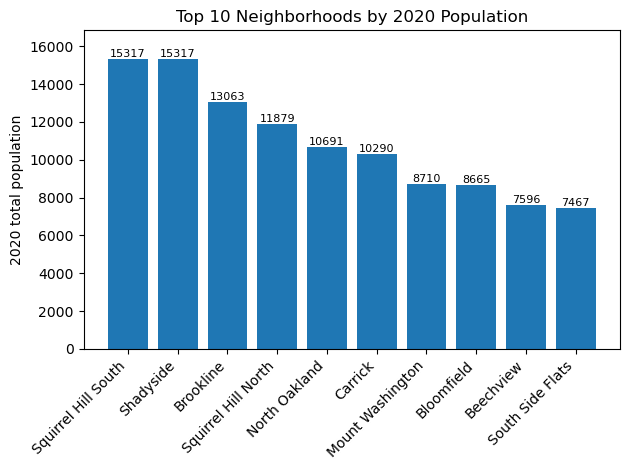

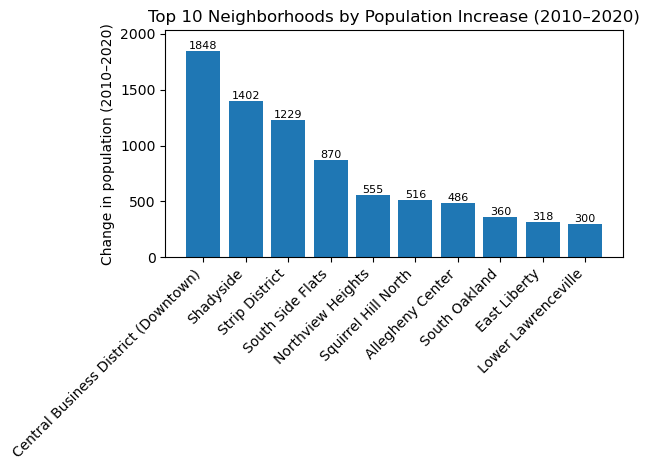

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Population.csv")

# ---------------------------
# graph 1: top 10 by 2020 total population
# ---------------------------
g1 = df.sort_values("2020_Total_Population", ascending=False).head(10)

plt.figure()
bars = plt.bar(g1["Neighborhood"], g1["2020_Total_Population"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("2020 total population")
plt.title("Top 10 Neighborhoods by 2020 Population")

# add numbers on top
ax = plt.gca()
plt.ylim(0, g1["2020_Total_Population"].max() * 1.10)
for b in bars:
    y = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, y, str(int(y)), ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

# ---------------------------
# graph 2: top 10 highest *positive* change 2010→2020
# ---------------------------
pos = df[df["Change_2010_to_2020_Total_Population"] > 0]
g2 = pos.sort_values("Change_2010_to_2020_Total_Population", ascending=False).head(10)

plt.figure()
bars = plt.bar(g2["Neighborhood"], g2["Change_2010_to_2020_Total_Population"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Change in population (2010–2020)")
plt.title("Top 10 Neighborhoods by Population Increase (2010–2020)")

ax = plt.gca()
plt.ylim(0, g2["Change_2010_to_2020_Total_Population"].max() * 1.10)
for b in bars:
    y = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, y, str(int(y)), ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


After reviewing all the metric together with my team, we decided on picking Squirrel Hill South. This neighbrohood has the most population of 15317 people. Even though Squirrel Hill South has a low population increase rate, this means that Squirrel Hill South has a mature and stable neighborhood. In addition, no population decrease means that no people are leaving the neighborhood, so the people living in the neighborhood are happy with their current conditions. 

# City Parks

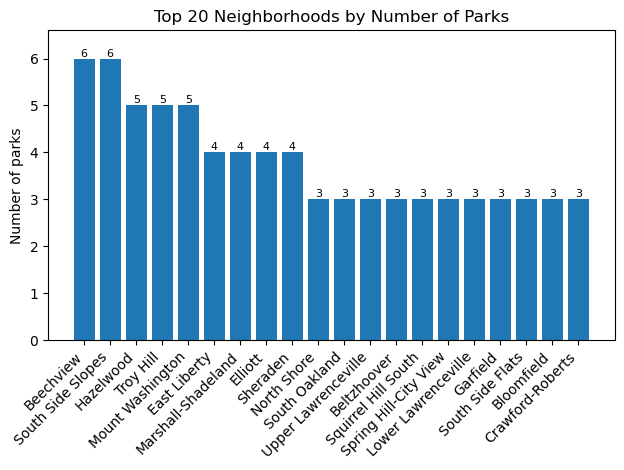

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the parks dataset
df = pd.read_csv("parks.csv")
df.head(10)#Keep only rows where the type is exactly "Park"
parks_only = df[df["type"] == "Park"].copy()

#Group by neighborhood and count number of parks
park_counts = (
    parks_only.groupby("neighborhood")["_id"]
    .count()
    .reset_index()
    .rename(columns={"_id": "num_parks"})
)

#Sort by number of parks (descending) and keep top 20
top20_parks = park_counts.sort_values("num_parks", ascending=False).head(20)

top20_parks
#Create bar graph of top 20 neighborhoods by number of parks
plt.figure()
bars = plt.bar(top20_parks["neighborhood"], top20_parks["num_parks"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of parks")
plt.title("Top 20 Neighborhoods by Number of Parks")

#Add a little space above tallest bar
plt.ylim(0, top20_parks["num_parks"].max() * 1.10 if top20_parks["num_parks"].max() > 0 else 1)

#Add value labels on top of each bar
ax = plt.gca()
for b in bars:
    y = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2,
        y,
        str(int(y)),
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

After reviewing with my team, We decided 

# Final Conclusion
After reviewing all three metrics, we concluded that Squirrel Hill South is the best overall neighborhood in Pittsburgh. It consistently performed at the top of our analyses, leading in both the IEP/gifted enrollment metric and the population metric. Not only does it have the highest population (15,317 residents), but that population has also remained stable over the past decade, suggesting long term satisfaction among residents. While Squirrel Hill South did not take the top spot in the parks dataset, it still finished strong with three official city parks, placing it solidly among the more park accessible neighborhoods. When we evaluated all results together, Squirrel Hill South was the only neighborhood that performed well across every metric. Because it excels in educational access, demonstrates stable long-term residency, and offers reliable access to parks and green space, Squirrel Hill South stands out as the best neighborhood in our entire study.